# Adversarial Sample

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import eigencharacter as ec
import numpy as np
import matplotlib.pyplot as plt

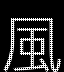

In [3]:
ec.text2bitmap_interleaved("風")

In [4]:
svd_path = ec.get_resource_path("", "character_svd.pkl")

In [5]:
import pickle
with svd_path.open("rb") as fin:
    svd = pickle.load(fin)

In [24]:
su = ec.SvdUtils(svd_path, 50)

In [25]:
ch = "龍"
im0 = ec.text2bitmap(ch, im_dim=(64,75))
im1 = ec.text2bitmap_interleaved(ch, im_dim=(64,75))
im2 = ec.text2bitmap_blurred(ch, im_dim=(64,75))
im3 = ec.text2bitmap_flipped(ch, im_dim=(64,75))
im4 = ec.text2bitmap_random(ch, im_dim=(64,75), seed=12345)
im_vec0 = ec.im2matrix(im0)[0]
im_vec1 = ec.im2matrix(im1)[0]
im_vec2 = ec.im2matrix(im2)[0]
im_vec3 = ec.im2matrix(im3)[0]

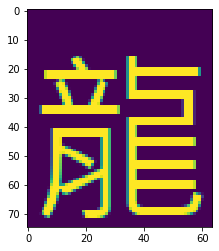

In [26]:
plt.imshow(im0)

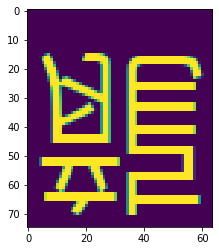

In [27]:
plt.imshow(im3)

In [28]:
k = 300

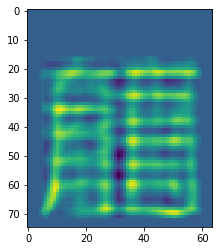

In [29]:
plt.imshow(ec.recon(su.recon_svd(su.project_svd(im_vec0)), 64))

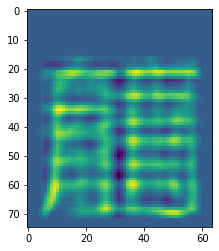

In [30]:
plt.imshow(ec.recon(su.recon_svd(su.project_svd(im_vec1)), 64))

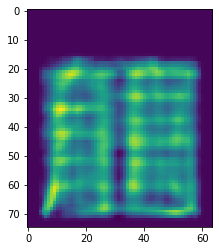

In [31]:
plt.imshow(ec.recon(su.recon_svd(su.project_svd(im_vec2)), 64))

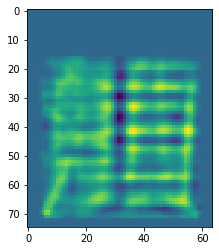

In [32]:
plt.imshow(ec.recon(su.recon_svd(su.project_svd(im_vec3)), 64))

# VAE recon

In [37]:
import torch
import eigencharacter.neural as ecn

In [35]:
exp_a_path = ec.get_exp_dir("EC_vae", "exp_a")

In [44]:
from collections import namedtuple
Parameter = namedtuple('Parameter', ['fc', 'vae'])
param_a = Parameter( 100,  10)
param_b = Parameter( 500,  50)
param_c = Parameter(1000, 100)
model_path_a = ec.get_exp_dir("EC_vae", "exp_a") / 'vae_model_exp_a.pth'
model_path_b = ec.get_exp_dir("EC_vae", "exp_b") / 'vae_model_exp_b.pth'
model_path_c = ec.get_exp_dir("EC_vae", "exp_c") / 'vae_model_exp_c.pth'

In [58]:
vae_a = ecn.VAE(4800, param_a.fc, param_a.vae)
vae_a.load_state_dict(torch.load(model_path_a))
vae_b = ecn.VAE(4800, param_b.fc, param_b.vae)
vae_b.load_state_dict(torch.load(model_path_b))
vae_c = ecn.VAE(4800, param_c.fc, param_c.vae)
vae_c.load_state_dict(torch.load(model_path_c))

<All keys matched successfully>

In [59]:
def normalize(x):
    return (x/255).type(torch.float)

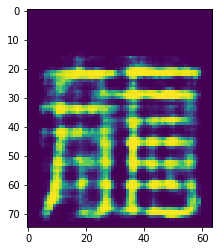

In [66]:
with torch.no_grad():
    recon_b = vae_b(normalize(torch.tensor(im_vec0)))[0]
    plt.imshow(ec.recon(recon_b, 64))    